In [1]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
from textwrap import wrap
%matplotlib inline
import glob

In [767]:
##############################################
##############################################
##############################################
##############################################
## below is code to plot the results of running this with "run.sh classify.ipynb"
## e.g "run.sh classify.ipynb -thing -nsamples 32 -seed 4"
## it writes a pickle file with the results for each run.


In [768]:
#glob.glob("../logs/*/*/*.pkl")

In [106]:
ddf = pandas.DataFrame()
for f in glob.glob("../logs/*/*/*.pkl"):
    d = (pickle.load(open(f,"rb")))
    ddf = ddf.append(pandas.DataFrame(d))

In [107]:
df = ddf.copy()

In [108]:
df.shape

(40000, 39)

In [109]:
del df["optimizer"]
del df["blur"]
del df["model_flat_layer"]
del df["transform"]
del df["cuda"]

In [110]:
for i in df.columns:
    if "valid_dataset" in i:
        print (i)
        del df[i]
    if "test_dataset" in i:
        print (i)
        del df[i]
    if "train_dataset_" in i:
        print(i)
        del df[i]

test_dataset
test_dataset_blur
test_dataset_maxmasks
test_dataset_mode
test_dataset_nsamples
test_dataset_seed
train_dataset_blur
train_dataset_maxmasks
train_dataset_mode
train_dataset_nsamples
train_dataset_seed
valid_dataset
valid_dataset_blur
valid_dataset_maxmasks
valid_dataset_mode
valid_dataset_nsamples
valid_dataset_seed


In [111]:
df.head(10)

,batch_size,best_testauc_for_validauc,conditional_reg,epoch,maxmasks,model,nsamples,num_epochs,optimizer_lr,penalise_grad,penalise_grad_usemask,seed,shuffle,testauc,train_dataset,trainloss,validauc
0,32,0.531250,True,0,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.531250,LungMSDDataset,5.293580e+00,0.515625
1,32,0.531250,True,1,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.500000,LungMSDDataset,5.816713e+07,0.468750
2,32,0.531250,True,2,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.515625,LungMSDDataset,7.546829e+07,0.500000
3,32,0.531250,True,3,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.484375,LungMSDDataset,1.552253e+08,0.484375
4,32,0.531250,True,4,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.468750,LungMSDDataset,1.259560e+08,0.453125
5,32,0.531250,True,5,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.515625,LungMSDDataset,1.461724e+08,0.453125
6,32,0.531250,True,6,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.468750,LungMSDDataset,1.541174e+08,0.468750
7,32,0.484375,True,7,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.484375,LungMSDDataset,2.507498e+08,0.593750
8,32,0.484375,True,8,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.500000,LungMSDDataset,2.389823e+08,0.593750
9,32,0.484375,True,9,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.484375,LungMSDDataset,1.700538e+08,0.468750


In [112]:
print (df.train_dataset.unique())
print (df.penalise_grad.unique())
print (df.nsamples.unique())
print (df.maxmasks.unique())
print (df.optimizer_lr.unique())

['LungMSDDataset']
['diff_from_ref' 'False']
[64]
[256]
[0.0001]


In [113]:
df = df[(df.nsamples == 64) & (df.optimizer_lr==0.0001)]

In [114]:
df.head()

,batch_size,best_testauc_for_validauc,conditional_reg,epoch,maxmasks,model,nsamples,num_epochs,optimizer_lr,penalise_grad,penalise_grad_usemask,seed,shuffle,testauc,train_dataset,trainloss,validauc
0,32,0.53125,True,0,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.531250,LungMSDDataset,5.293580e+00,0.515625
1,32,0.53125,True,1,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.500000,LungMSDDataset,5.816713e+07,0.468750
2,32,0.53125,True,2,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.515625,LungMSDDataset,7.546829e+07,0.500000
3,32,0.53125,True,3,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.484375,LungMSDDataset,1.552253e+08,0.484375
4,32,0.53125,True,4,256,SimpleCNN,64,500,0.0001,diff_from_ref,None,10,True,0.468750,LungMSDDataset,1.259560e+08,0.453125


In [115]:
#df[(df.nsamples == 64)]

In [116]:
df[(df.epoch==499)].groupby(["penalise_grad","conditional_reg", "epoch", "seed"]).mean()

batch_size  \
penalise_grad conditional_reg epoch seed               
False         False           499   0             32   
                                    1             32   
                                    2             32   
                                    3             32   
                                    4             32   
                                    5             32   
                                    6             32   
                                    7             32   
                                    8             32   
                                    9             32   
                                    10            32   
                                    11            32   
                                    12            32   
                                    13            32   
                                    14            32   
                                    15            32   
                                    16            32   
                                    17            32   
                                    18            32   
                                    19            32   
diff_from_ref False           499   0             32   
                                    1             32   
                                    2             32   
                                    3             32   
                                    4             32   
                                    5             32   
                                    6             32   
                                    7             32   
                                    8             32   
                                    9             32   
                                    10            32   
                                    11            32   
                                    12            32   
                                    13            32   
                                    14            32   
                                    15            32   
                                    16            32   
                                    17            32   
                                    18            32   
                                    19            32   
              True            499   0             32   
                                    1             32   
                                    2             32   
                                    3             32   
                                    4             32   
                                    5             32   
                                    6             32   
                                    9             32   
                                    10            32   
                                    12            32   
                                    13            32   
                                    14            32   
                                    15            32   
                                    16            32   
                                    17            32   
                                    18            32   
                                    19            32   

                                          best_testauc_for_validauc  maxmasks  \
penalise_grad conditional_reg epoch seed                                        
False         False           499   0                      0.671875       256   
                                    1                      0.750000       256   
                                    2                      0.593750       256   
                                    3                      0.609375       256   
                                    4                      0.390625       256   
                                    5                      0.609375       256   
                                    6                      0.437500       256   
        

In [117]:
df[(df.epoch==99)].groupby(["penalise_grad"])[["best_testauc_for_validauc"]].count()

,best_testauc_for_validauc
penalise_grad,
False,20
diff_from_ref,60


In [118]:
qq = df[(df.epoch==99)].groupby(["penalise_grad", "conditional_reg"])[["best_testauc_for_validauc"]]
q = qq.mean().join(qq.std(),rsuffix='_std')
q = q.join(qq.count(),rsuffix='_count')
q

best_testauc_for_validauc  \
penalise_grad conditional_reg                              
False         False                             0.585938   
diff_from_ref False                             0.595703   
              True                              0.607812   

                               best_testauc_for_validauc_std  \
penalise_grad conditional_reg                                  
False         False                                 0.092021   
diff_from_ref False                                 0.089388   
              True                                  0.095367   

                               best_testauc_for_validauc_count  
penalise_grad conditional_reg                                   
False         False                                         20  
diff_from_ref False                                         40  
              True                                          20

In [872]:
#subsetdata[subsetdata.penalise_grad == "diff_from_ref"].groupby("seed").count()

False num trials 20
diff_from_ref num trials 60


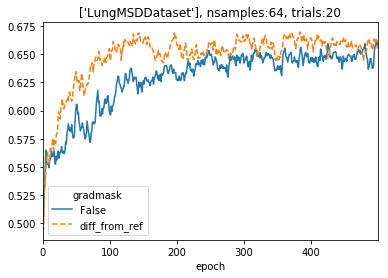

In [119]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df.reindex()
for k,i in enumerate(sorted(subsetdata.penalise_grad.unique())):

    thisdata = subsetdata[subsetdata.penalise_grad == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="gradmask")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


False num trials 40
True num trials 20


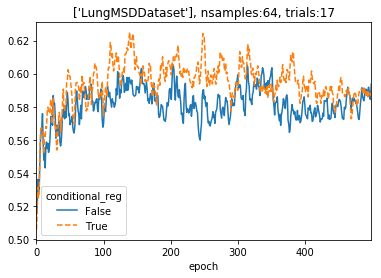

In [121]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[df.penalise_grad=="diff_from_ref"].reindex()
for k,i in enumerate(sorted(subsetdata.conditional_reg.unique())):

    thisdata = subsetdata[subsetdata.conditional_reg == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="testauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="conditional_reg")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


In [623]:
#"num trials", subsetdata[subsetdata.thing == False].groupby(["epoch"]).count()

AttributeError: 'DataFrame' object has no attribute 'maskblur'

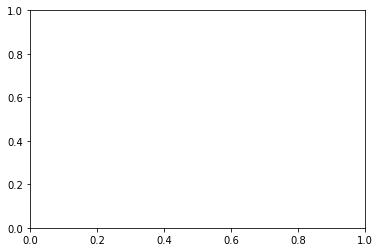

In [402]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.maskblur == 3) & 
              (df.batchsize == 16) & 
              (df.annealinglambda == 1.0) & 
              (df.thingstyle == 1.0) & 
              (df.epoch < 800) &
              (df.dataset == "tnt")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
plt.ylim(.55, 0.81);
#plt.xlim(0,500);

params = subsetdata.drop(["trainloss", "validauc", "seed", "epoch"], axis=1).iloc[0].to_dict()
params = "\n".join(wrap(str(params), 60))
plt.title(str(params) + ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

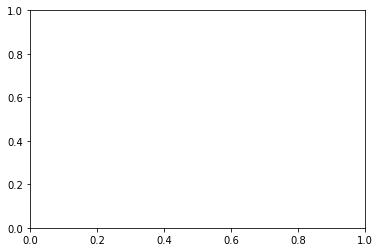

In [403]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.thing == True) & 
              (df.maskblur == 2) & 
              (df.annealinglambda == 1.0) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
#plt.ylim(.65, 0.81);
plt.xlim(0,500);

plt.title("Vary maxmasks used, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

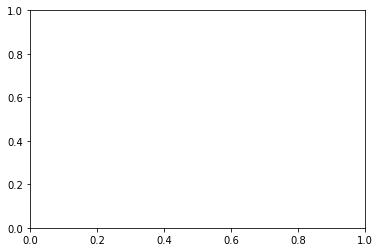

In [404]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 64) & 
              (df.thing == True) & 
              (df.maskblur == 3) & 
              (df.maxmasks == 64) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.annealinglambda.unique())):

    thisdata = subsetdata[subsetdata.annealinglambda == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="annealinglambda")
#plt.ylim(.65, 0.85);
#plt.xlim(0,600);

plt.title("Vary annealinglambda, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));
